<a href="https://colab.research.google.com/github/Saifullah785/python-data-science-handbook-notes/blob/main/02_08_Sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sorting Arrays:**

Demonstrates basic sorting of Python lists using sorted() and sort().

# **Fast Sorting in Numpy:**

Introduces NumPy's efficient sorting functions np.sort() and np.argsort().

# **Sorting Along Rows or Columns:**

Shows how to sort multi-dimensional NumPy arrays along specific axes.

# **Partial Sorts:**

Partitioning: Explains np.partition() for efficient partial sorting to find the k smallest elements.

# **Example : K-Nearest Neighbors:**

Illustrates how sorting and partitioning can be used in the K-Nearest Neighbors algorithm to find the closest data points.


# **Summary:**

The notebook covers various methods for sorting data in Python, starting with basic list sorting and progressing to more efficient NumPy functions for sorting and partitioning arrays, including examples of their application in finding nearest neighbors.

# **Sorting Arrays**

In [48]:
# Define a list of numbers
L = [3, 1, 4, 1, 5, 9, 2, 6]

# Use the built-in sorted() function to return a new sorted list
sorted(L) # returns a sorted copy


[1, 1, 2, 3, 4, 5, 6, 9]

In [49]:
L

[3, 1, 4, 1, 5, 9, 2, 6]

In [26]:
# Use the list's sort() method to sort the list in-place
L.sort()
# Print the modified list
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [27]:
# Use sorted() on a string, which returns a sorted list of characters
sorted('python')

['h', 'n', 'o', 'p', 't', 'y']

# **Fast Sorting in Numpy:**

 **np.sort and np.argsort**

In [28]:
import numpy as np

# Define a NumPy array
x = np.array([2, 1, 4, 3, 5])
# Use np.sort() to return a sorted copy of the array
np.sort(x)

array([1, 2, 3, 4, 5])

In [29]:
# Use the array's sort() method to sort the array in-place
x.sort()
# Print the modified array
print(x)

[1 2 3 4 5]


In [30]:
# Define a NumPy array
x = np.array([2,1,4,3,5])
# Use np.argsort() to get the indices that would sort the array
i = np.argsort(x)
# Print the indices
print(i)

[1 0 3 2 4]


In [31]:
# Use the indices obtained from argsort to access elements of the original array in sorted order
x[i]

array([1, 2, 3, 4, 5])

# **Sorting Along Rows or Columns**

In [32]:
# Initialize a random number generator with a seed for reproducibility
rng = np.random.default_rng(seed=42)
# Generate a 4x6 array of random integers between 0 and 10
X = rng.integers(0, 10, (4, 6))
# Print the array
print(X)

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [33]:
# Use np.sort() with axis=0 to sort each column of the array
np.sort(X, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [34]:
# Use np.sort() with axis=1 to sort each row of the array
np.sort(X, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

# **Partial Sorts: Partitioning**

In [35]:
# Define a NumPy array
x = np.array([7,2,3,1,6,5,4])
# Use np.partition() to find the element that would be at the 3rd index if the array were sorted,
# and place all smaller elements before it and all larger elements after it.
np.partition(x, 3)

array([1, 2, 3, 4, 5, 6, 7])

In [36]:
# Use np.partition() with axis=1 to partition each row of the array X
# The element that would be at index 2 if the row were sorted is placed at index 2,
# smaller elements are placed before it, and larger elements after it.
np.partition(X, 2, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

# **Example : K-Nearest Neighbors**

In [37]:
# Generate a 10x2 array of random numbers between 0 and 1
X = rng.random((10, 2))

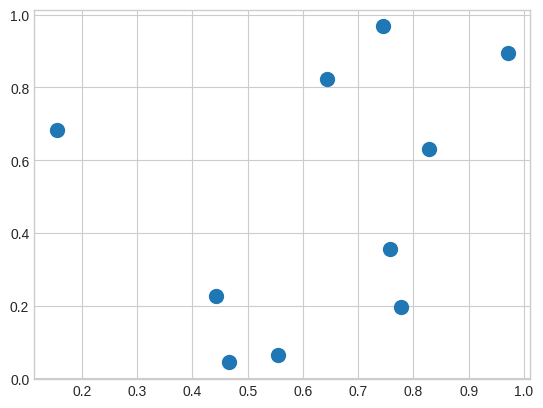

In [38]:
# Enable inline plotting in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
# Set the plotting style
plt.style.use('seaborn-v0_8-whitegrid')
# Create a scatter plot of the points in X
plt.scatter(X[:, 0], X[:, 1], s=100)

In [39]:
# Calculate the squared Euclidean distance between each pair of points in X
# X[:, np.newaxis] adds a new dimension to X, making it (10, 1, 2)
# X[np.newaxis, :] adds a new dimension to X, making it (1, 10, 2)
# The difference between these two arrays results in a (10, 10, 2) array where
# each element (i, j, :) contains the difference in coordinates between point i and point j.
# Squaring this difference gives the squared difference in coordinates.
# Summing along the last axis (axis=-1) gives the sum of squared differences for each pair of points,
# which is the squared Euclidean distance.
dist_sq = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) **2, axis=-1)

In [40]:
# for each pair of points, compute differences in their coordinates
# This creates a 10x10x2 array where differences[i, j, :] is the difference
# between the coordinates of point i and point j.
differences = X[:, np.newaxis] - X[np.newaxis, :]
# Print the shape of the differences array
differences.shape

(10, 10, 2)

In [41]:
# Square the coordinate differences
# This squares each element in the differences array.
sq_differences = differences ** 2
# Print the shape of the squared differences array
sq_differences.shape

(10, 10, 2)

In [42]:
# sum the coordinate differences to get the squared distance
# Summing along the last axis (axis=-1) calculates the sum of squared differences
# for each pair of points, resulting in a 10x10 array of squared distances.
dist_sq = sq_differences.sum(axis=-1)
# Print the shape of the squared distance matrix
dist_sq.shape

(10, 10)

In [43]:
# Get the diagonal elements of the squared distance matrix
# The diagonal elements represent the squared distance of each point to itself, which is always 0.
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
# Find the indices that would sort the squared distance matrix along each row
# This gives the indices of the nearest points for each point, sorted by distance.
nearest = np.argsort(dist_sq, axis=1)
# Print the array of nearest indices
print(nearest)

[[0 9 3 5 4 8 1 6 2 7]
 [1 7 2 6 4 8 3 0 9 5]
 [2 7 1 6 4 3 8 0 9 5]
 [3 0 4 5 9 6 1 2 8 7]
 [4 6 3 1 2 7 0 5 9 8]
 [5 9 3 0 4 6 8 1 2 7]
 [6 4 2 1 7 3 0 5 9 8]
 [7 2 1 6 4 3 8 0 9 5]
 [8 0 1 9 3 4 7 2 6 5]
 [9 0 5 3 4 8 6 1 2 7]]


In [45]:
# Use np.argpartition() to find the indices of the K+1 nearest neighbors for each point
# This is more efficient than argsort if you only need the indices of the smallest elements.
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

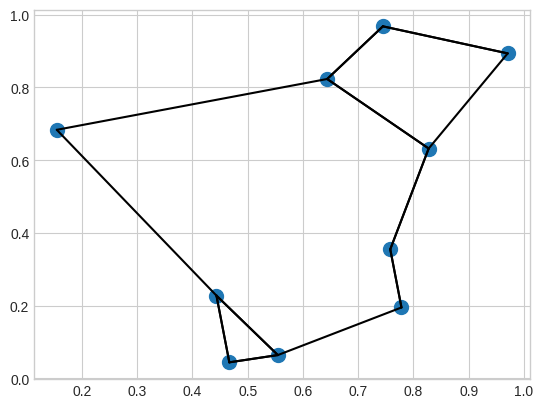

In [46]:
# Create a scatter plot of the points
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors

# Define the number of nearest neighbors to consider
K =2

# Iterate through each point
for i in range(X.shape[0]):
    # Iterate through the indices of the K+1 nearest neighbors for the current point
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # Use zip to pair the x-coordinates and y-coordinates of the two points
        plt.plot(*zip(X[j], X[i]), color='black')